In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,37.0,125701579.0,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,244285107.0,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,36.0,156773144.0,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,5.0,165103011.0,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,23.0,205138552.0,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125925 entries, 0 to 125924
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         125925 non-null  object 
 1   County                                             125925 non-null  object 
 2   City                                               125925 non-null  object 
 3   State                                              125925 non-null  object 
 4   Postal Code                                        125925 non-null  int64  
 5   Model Year                                         125925 non-null  int64  
 6   Make                                               125925 non-null  object 
 7   Model                                              125925 non-null  object 
 8   Electric Vehicle Type                              125925 non-null  object

In [4]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 108
DOL Vehicle ID                                         1
Vehicle Location                                       2
Electric Utility                                       1
2020 Census Tract                                      1
dtype: int64

In [5]:
df.dropna(inplace=True)

<ipython-input-11-7974c9e78a4e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette='viridis')


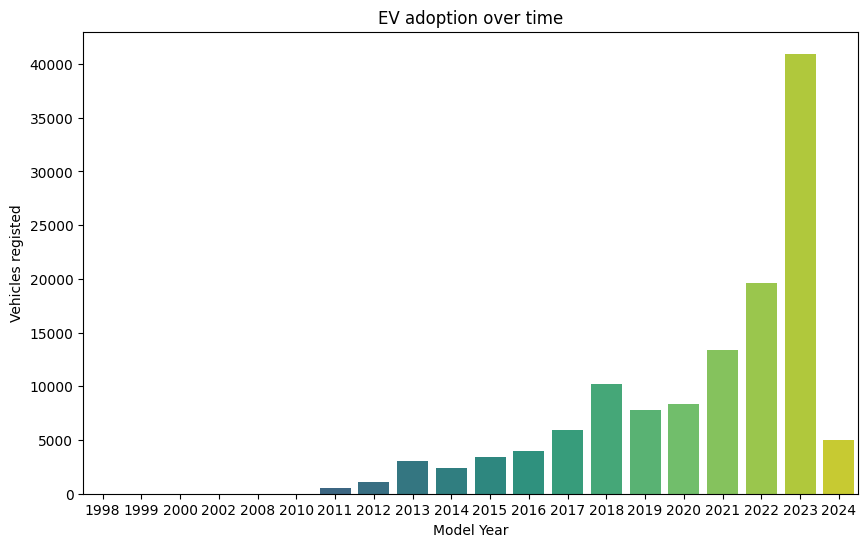

In [11]:
plt.figure(figsize=(10,6))

ev_adoption_by_year = df['Model Year'].value_counts().sort_values()
sb.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette='viridis')
plt.title('EV adoption over time')
plt.xlabel('Model Year')
plt.ylabel('Vehicles registed')
plt.show()

From the above bar chart we are able to see the vehicles registration gradually increasing since 2014 and there was an exponential increase in from 2021.

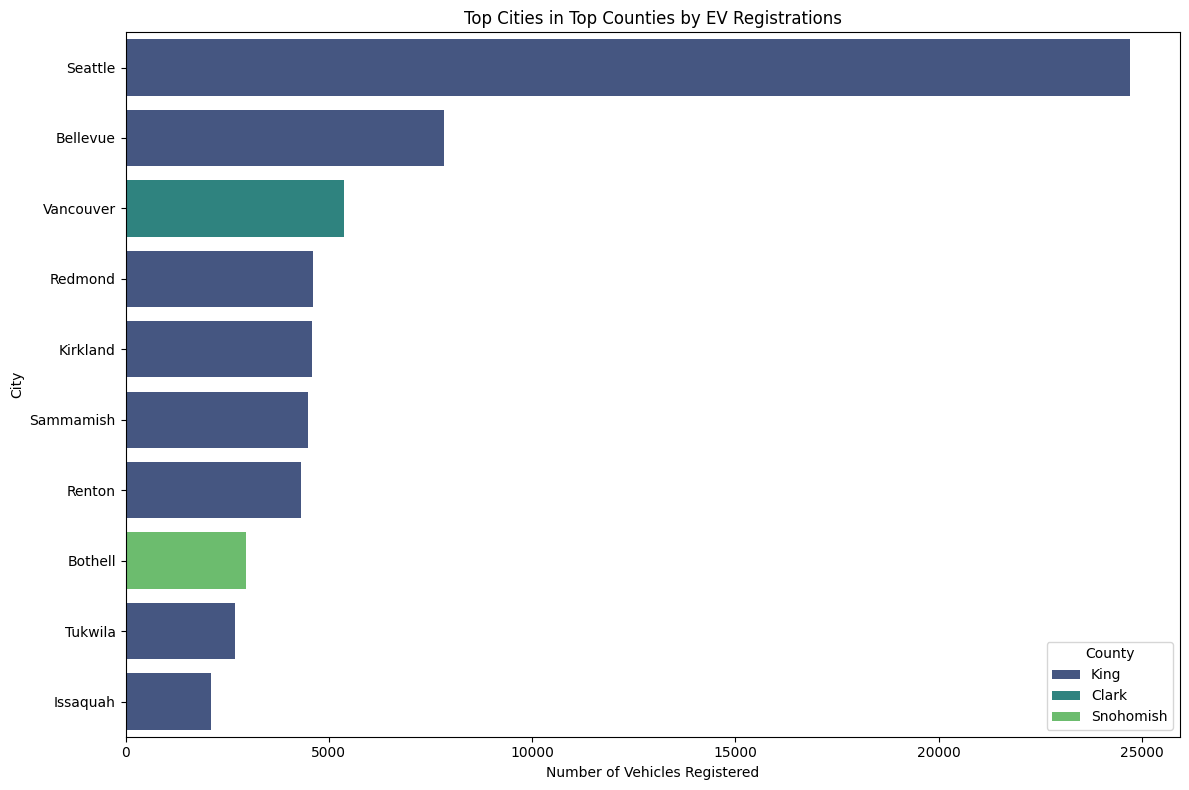

In [17]:
ev_county_distribution = df['County'].value_counts()
top_counties = ev_county_distribution.head(3).index

top_counties_data = df[df['County'].isin(top_counties)]

ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sb.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette='viridis')
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

The above bar chart shows vehichles registered in King, Clark and Snohomish county. The bars represent the cities along with their vehicle registration.

<ipython-input-18-426634a4ad40>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette='magma')


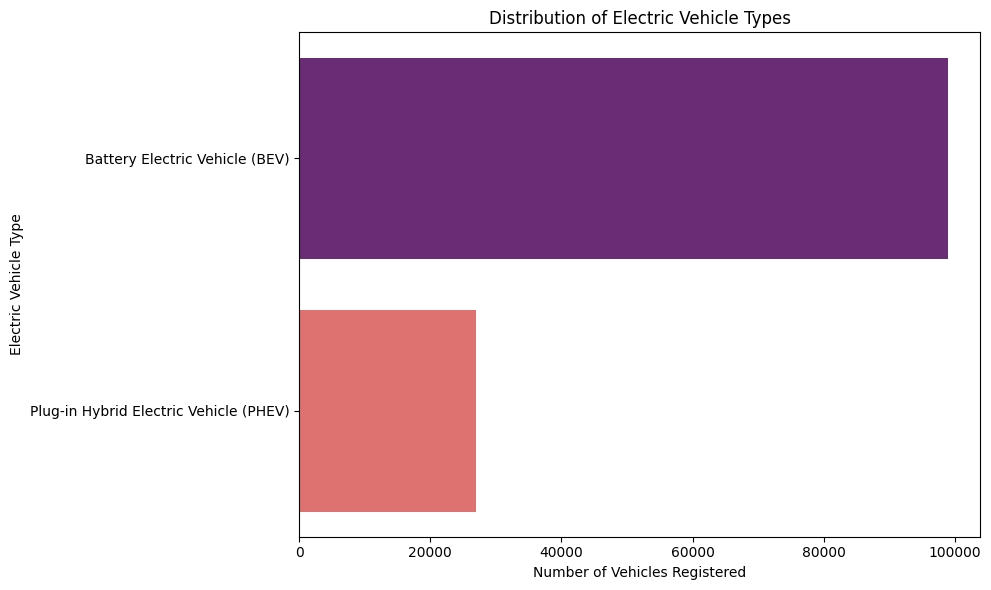

In [18]:
ev_type_distribution = df['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sb.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette='magma')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

The above graph shows that BEVs are more preferred as compared to PHEVs.

<ipython-input-19-786924a24550>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="magma")


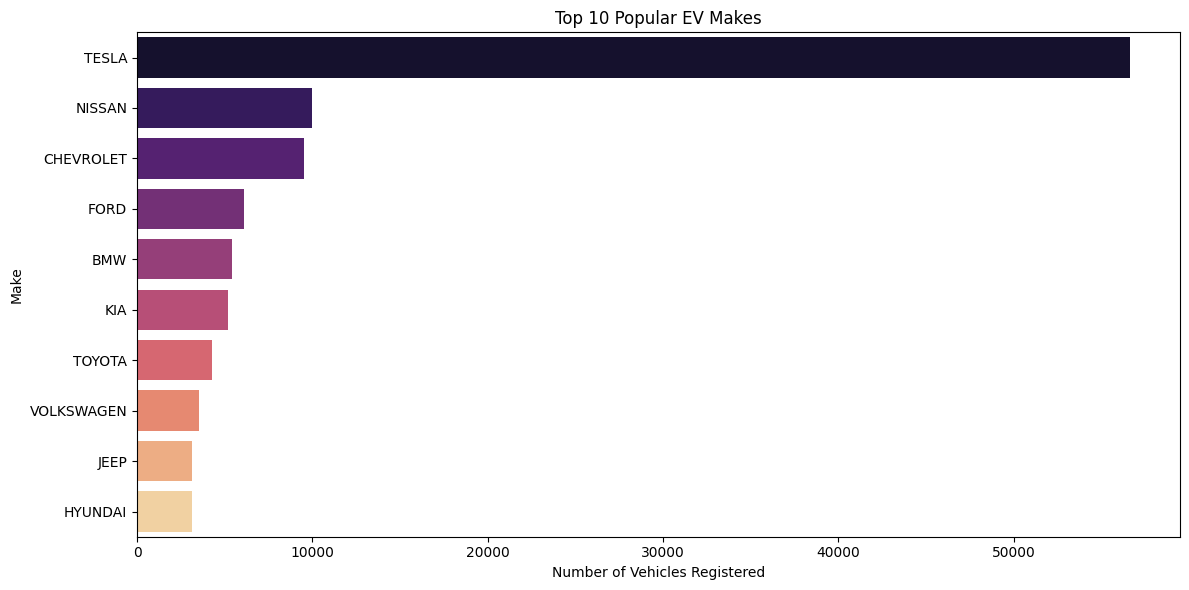

In [19]:
ev_make_distribution = df['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sb.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="magma")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

The above bar chart shows that Tesla is producing substantially large number of vehicles.

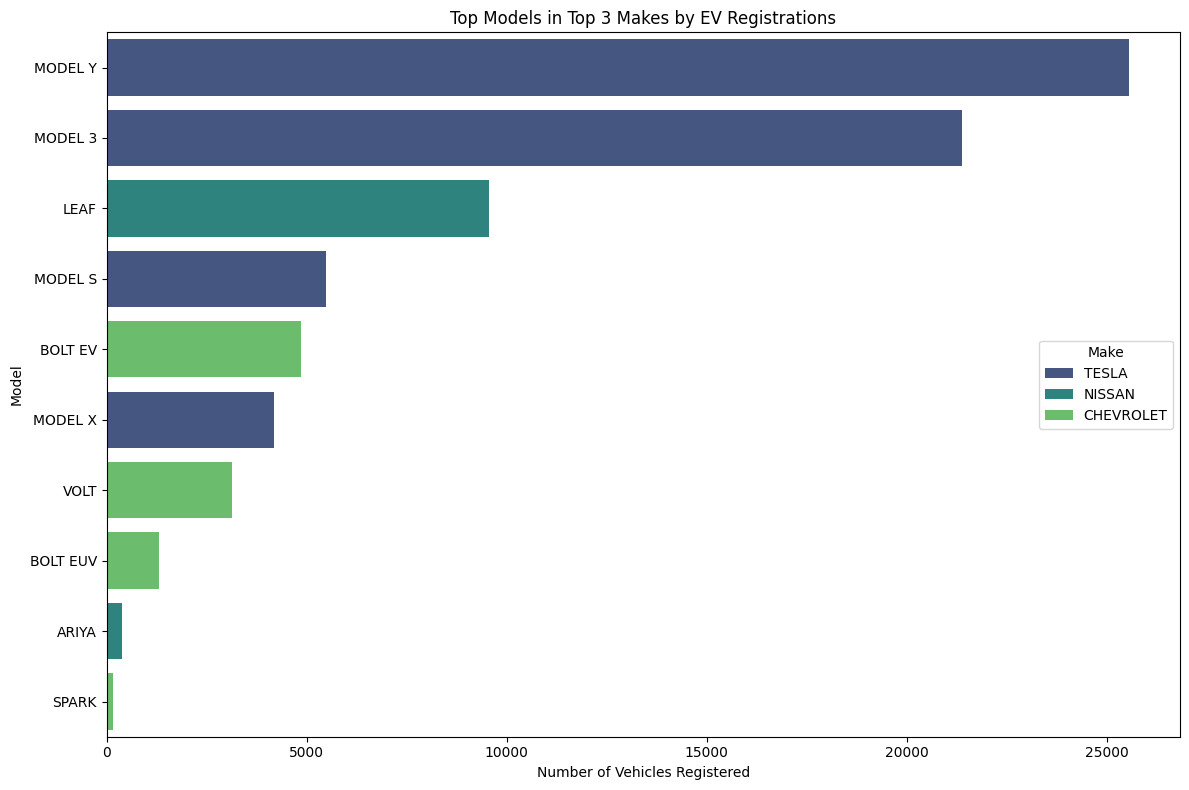

In [20]:
top_3_makes = ev_make_distribution.head(3).index

top_makes_data = df[df['Make'].isin(top_3_makes)]

ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sb.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

The above chart shows the most popular models along with their make. Here we can see that Tesla's Model Y and Model 3 have the highest numbers of vehicles registered

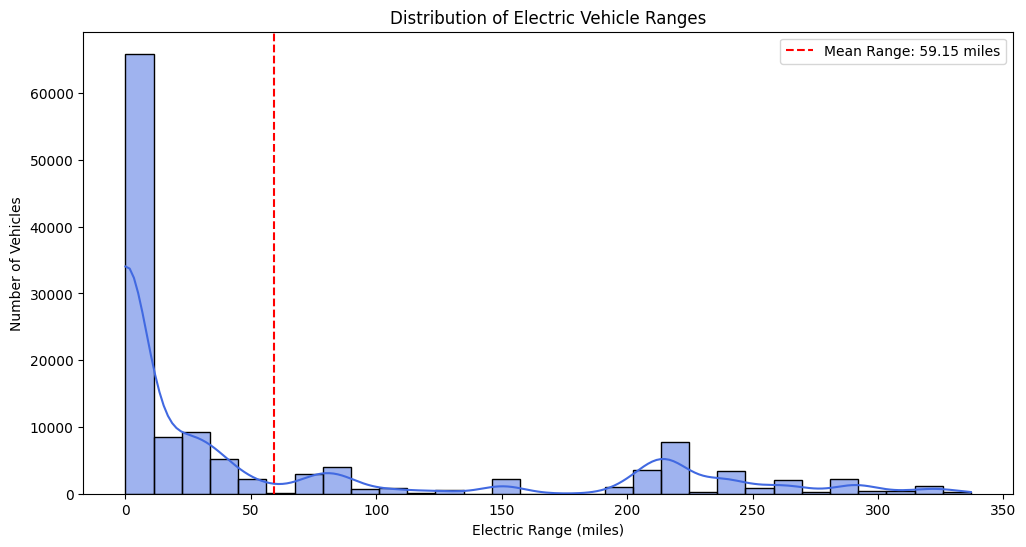

In [22]:
plt.figure(figsize=(12, 6))
sb.histplot(df['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(df['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {df["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

The above graph shows mean range where the vehicle can travel and it is surprisingly quite low with only 59.15 miles of mean range.

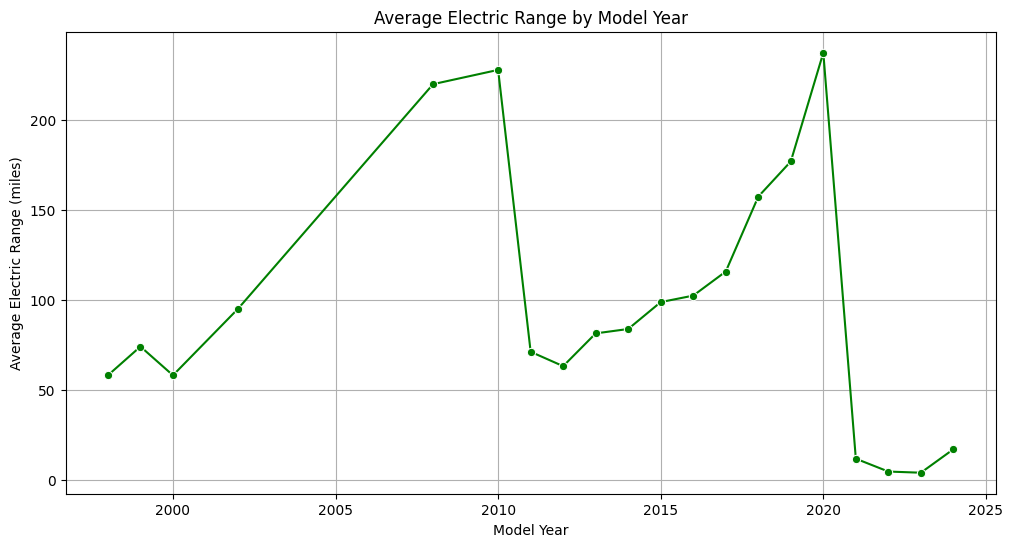

In [23]:
average_range_by_year = df.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sb.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024.

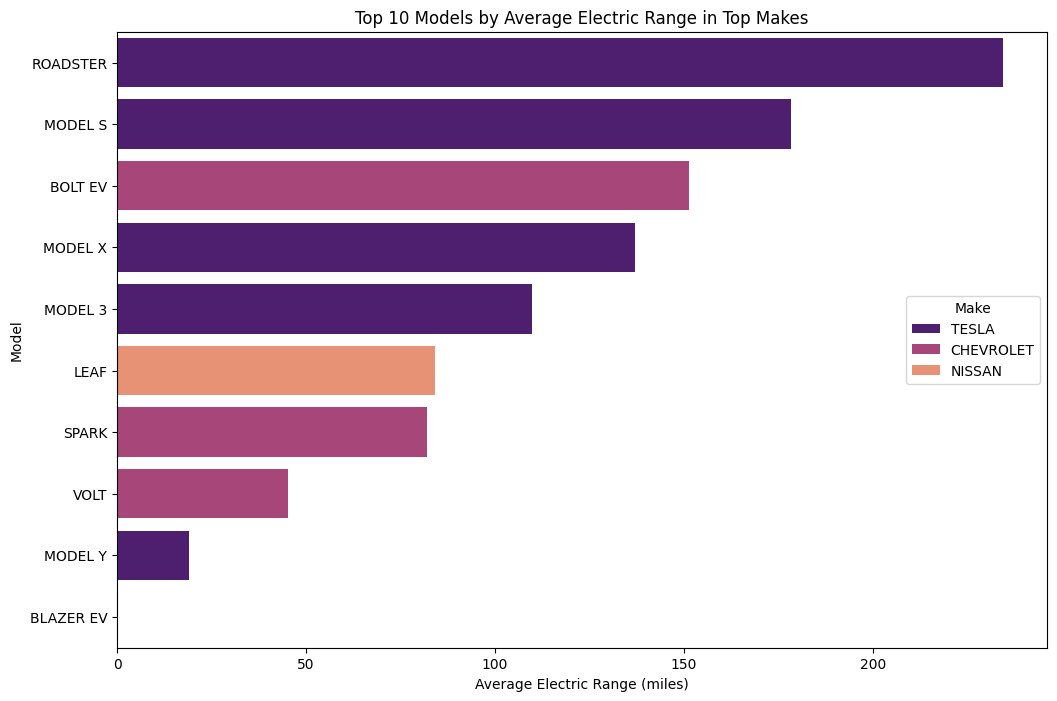

In [25]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sb.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="magma")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges.

In [26]:
ev_registration_counts = df['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1998        1
1999        2
2000        7
2002        1
2008       15
2010       17
2011      537
2012     1108
2013     3005
2014     2422
2015     3392
2016     3938
2017     5962
2018    10238
2019     7771
2020     8339
2021    13422
2022    19646
2023    40964
2024     5029
Name: count, dtype: int64

In [27]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 56479.0230039193, 2025: 85694.87389569031, 2026: 130023.697674244, 2027: 197283.2351379819, 2028: 299335.240903689, 2029: 454177.3982173468}


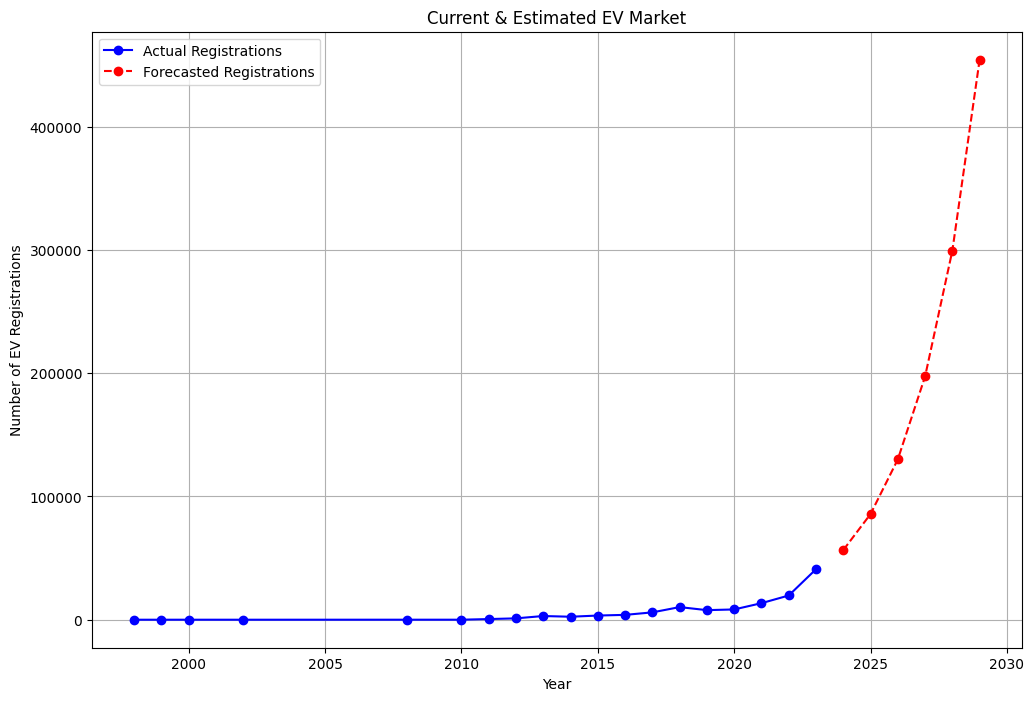

In [28]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()